In [52]:
import numpy as np
import scipy.linalg
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

In [53]:
from general_graph_utils import *

In [54]:
# plot formatting
plt.rc("text", usetex=False)
plt.rc("font", family = "serif",size=14)
plt.rc("figure",figsize=(14,12))
%config InlineBackend.figure_format = 'retina'

## Create a graph

Both directed and undirected versions are needed.

In [90]:
G_ex1 = nx.DiGraph()
G_ex1.add_nodes_from([1,2,3,4,5])
G_ex1.add_edges_from([(1,2),(2,1),(2,4),(4,2),(2,3),(3,2),(3,4),(4,3),(1,4),(4,1),(5,2),(5,1),(2,5),(1,5)])

In [91]:
G_ud1 = nx.Graph()
G_ud1.add_nodes_from([1,2,3,4,5])
G_ud1.add_edges_from([(1,2),(2,1),(2,4),(4,2),(2,3),(3,2),(3,4),(4,3),(1,4),(4,1),(5,2),(5,1),(2,5),(1,5)])

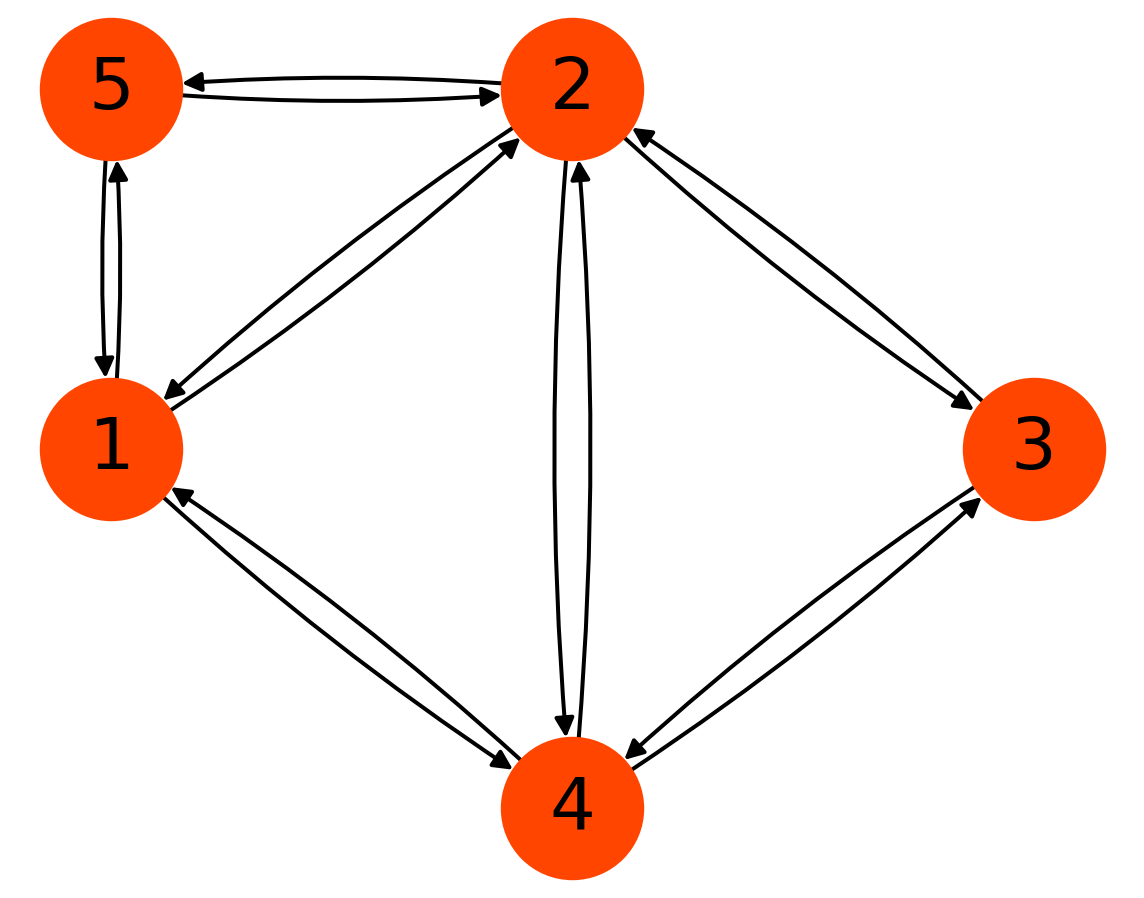

In [92]:
plt.rc("figure",figsize=(10,8))

pos = {2: (0,0), 4: (0, -4), 1:(-2, -2), 5: (-2, 0), 3: (2, -2)}

options = {
    "with_labels": True,
    "font_size": 36,
    "node_size": 5000,
    "node_color": "orangered",
    "edge_color": "black",
    "arrowsize": 20,
    'width': 2,
    "connectionstyle": 'arc3, rad = 0.05'
}

fig, ax = plt.subplots()
nx.draw_networkx(G_ex1, pos, **options)

ax.set_facecolor('white')
ax.axis('off')
fig.set_facecolor('white')
plt.show()
fig.savefig('G_d1_diagram.png')

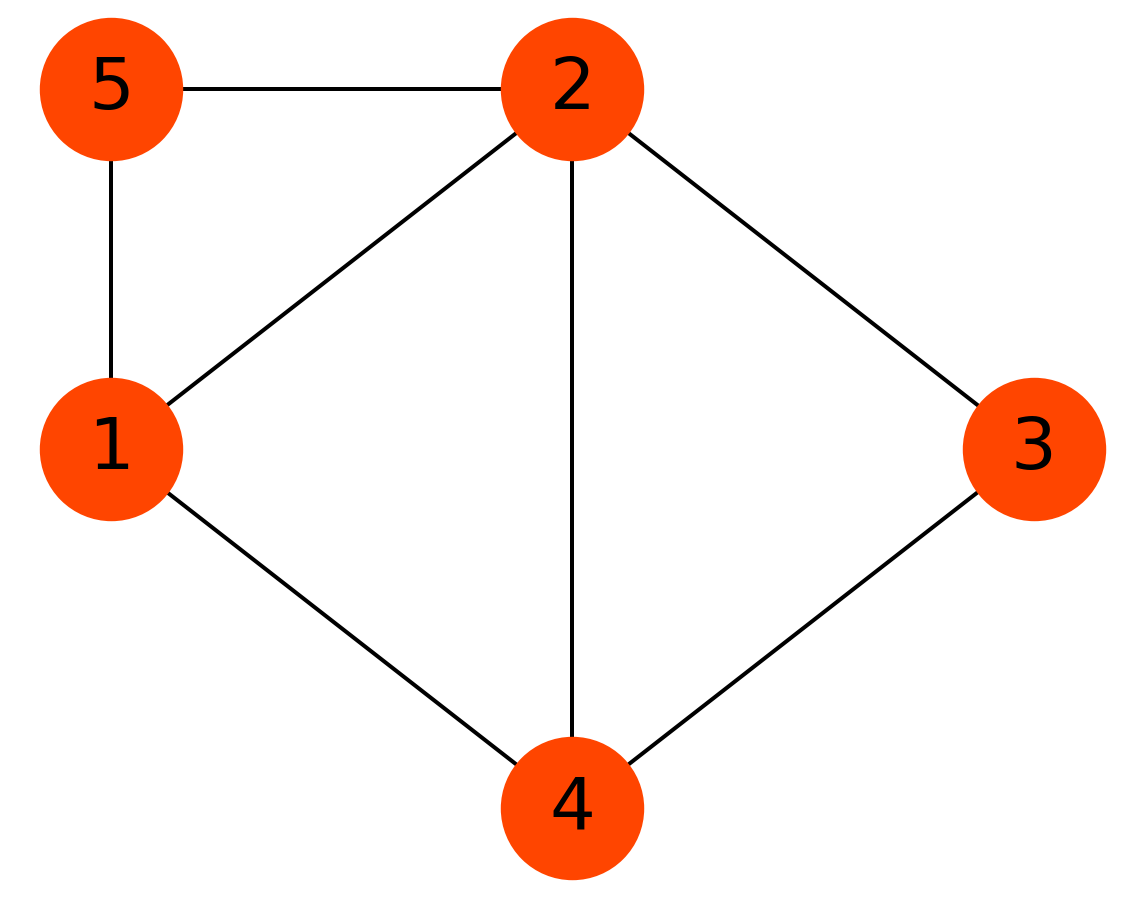

In [93]:
plt.rc("figure",figsize=(10,8))

pos = {2: (0,0), 4: (0, -4), 1:(-2, -2), 5: (-2, 0), 3: (2, -2)}

options = {
    "with_labels": True,
    "font_size": 36,
    "node_size": 5000,
    "node_color": "orangered",
    "edge_color": "black",
    "arrowsize": 20,
    'width': 2,
    "connectionstyle": 'arc3, rad = 0.05'
}

fig, ax = plt.subplots()
nx.draw_networkx(G_ud1, pos, **options)

ax.set_facecolor('white')
ax.axis('off')
fig.set_facecolor('white')
plt.show()
fig.savefig('G_ud1_diagram.png')

## Extract the following information from the graph

Node list: list of the nodes in the graph

Edge list: list of lists, where each element contains the pair of nodes connected by a single edge

Weight list: list of the edge labels corresponding to each edge

Weight dict: dictionary with edges in tuples (keys) and values (edge label)

Cycle list: list of listsm, where each element contains the nodes involved in a given cycle

Num_cycles: number of cycles

Num_nodes: number of nodes

Num_edges: number of edges

In [94]:
node_list = get_nodes(G_ex1)
edge_list = get_edges(G_ex1)
weight_dict, weight_list = get_weights(G_ex1)
cycle_list = get_cycle_nodes(G_ud1)

num_cycles = len(cycle_list)
num_nodes = len(node_list)
num_edges = len(edge_list)

print(node_list)
print(edge_list)
print(weight_list)
print(cycle_list)

print(weight_dict)

[1 2 3 4 5]
[[1 2]
 [1 4]
 [1 5]
 [2 1]
 [2 4]
 [2 3]
 [2 5]
 [3 2]
 [3 4]
 [4 2]
 [4 3]
 [4 1]
 [5 2]
 [5 1]]
[63. 47. 51. 68. 56. 57. 71. 30.  8. 45.  3. 52. 53. 70.]
[[2, 5, 1], [2, 4, 1], [2, 3, 4]]
{(1, 2): 63, (1, 4): 47, (1, 5): 51, (2, 1): 68, (2, 4): 56, (2, 3): 57, (2, 5): 71, (3, 2): 30, (3, 4): 8, (4, 2): 45, (4, 3): 3, (4, 1): 52, (5, 2): 53, (5, 1): 70}


## Set the parameters for computing higher-order autocorrelation functions and force-area curves

N: number of times to perturb a given parameter from equilibrium

all_affinities: Nx3 array containing the affinity for each cycle (num_cycles=3 here)

all_areas: Nx1 array containing the values for area between higher order autocorrelation functons

observable_ex1: the state function on the states of the Markov process

tau_n: values of the interval lengths specified for computing autocorrelation functions

In [139]:
N = 1000
all_affinities = np.zeros((N,3))
all_areas = np.zeros((N,1))

observable_ex1 = [3, 5, 7, 9, 11]
tau_n = np.around(np.arange(0.01,1.0,step=.0001), decimals = 2)

## Create data structures for the cycles in G and set each cycle at thermodynamic equilibrium

In [96]:
cycle_edges_forward, cycle_edges_backward, cycle_weights_forward, cycle_weights_backward = get_cycle_weights_edges(G_ud1,cycle_list,weight_dict)

In [97]:
cycle_weights_forward, edge_tracker = initial_equilibrium_parameter_set(cycle_list,cycle_edges_forward,cycle_weights_forward,cycle_weights_backward)
print(edge_tracker)

## Compute the cycle affinities for each cycle in G

In [98]:
products_f, products_b = calculate_cycle_products(cycle_weights_forward,cycle_weights_backward)
total_affinities = calculate_affinities(products_f, products_b, cycle_list)
print(total_affinities)

[0.53268459 0.24341234 1.40399394]


## Update the data structures with adjusted edge labels for the equilibrium case

In [99]:
for i in range(num_cycles):
    weight_dict[edge_tracker[i]] = cycle_weights_forward[i][0]

print(weight_dict)

In [100]:
weight_list = np.fromiter(weight_dict.values(), dtype=float)
print(weight_list)

[63. 47. 51. 68. 56. 57. 71. 30.  8. 45.  3. 52. 53. 70.]


## Calculate the Laplacian from weight_list and edge_list

In [101]:
L = Laplacian_all(edge_list,weight_list,num_nodes,num_edges)
print(L)

[[-190.   63.    0.   47.   51.]
 [  68. -191.   57.   56.   71.]
 [   0.   30.  -60.    8.    0.]
 [  52.   45.    3. -111.    0.]
 [  70.   53.    0.    0. -122.]]


## Calculate the forward and reverse higher order autocorrelation functions and the area between them

In [102]:
t, t_rev = NG_III_autocorrelation_analytical(observable_ex1,L,tau_n,alpha=1,beta=3)

In [103]:
print(np.abs(np.trapz(t)-np.trapz(t_rev)))

10.573546982486732


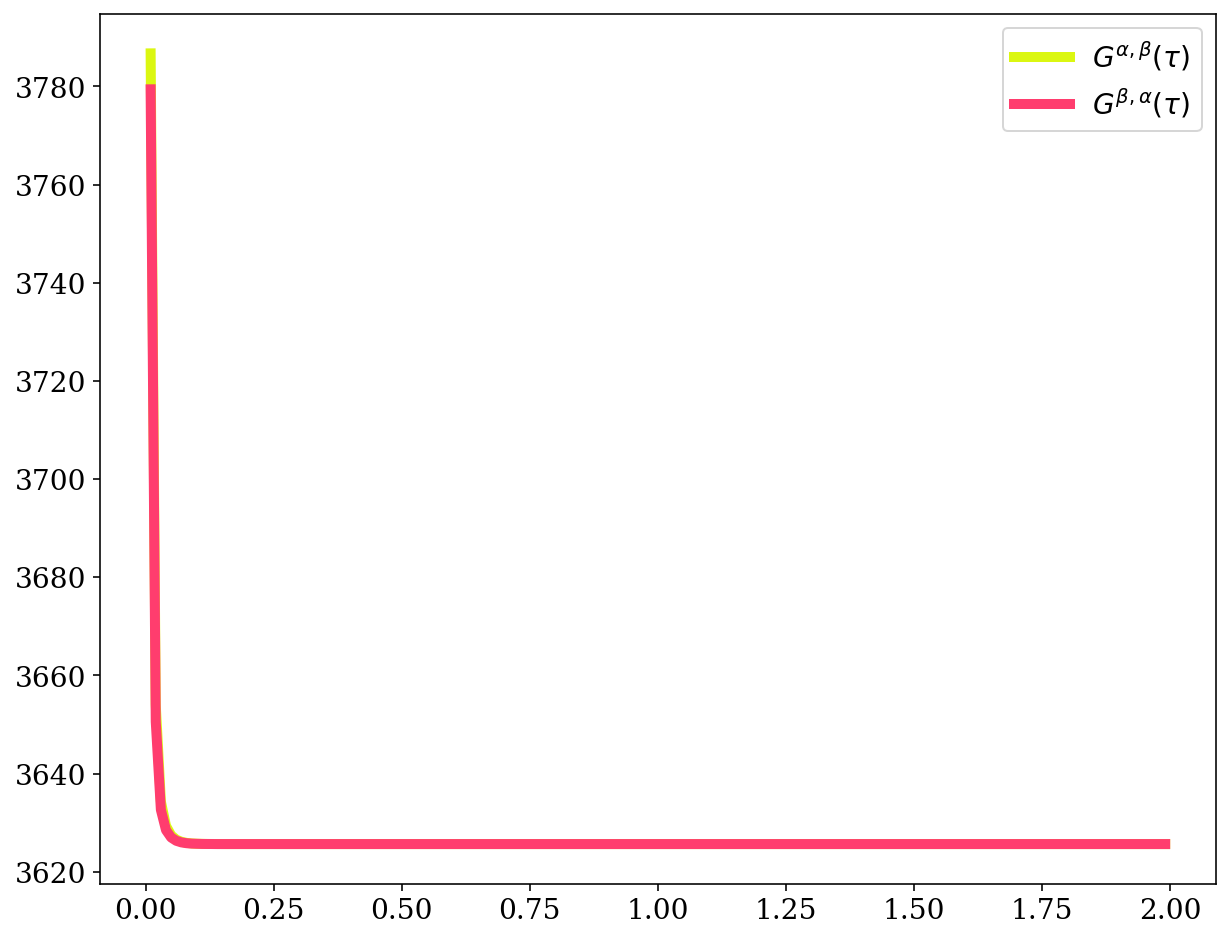

In [104]:
fig = plt.figure()
plt.plot(tau_n,t,label=r'$G^{\alpha,\beta}(\tau)$',linewidth=5,color='#DBF711')
plt.plot(tau_n,t_rev,label=r'$G^{\beta,\alpha}(\tau)$',linewidth=5, c= '#FF3D6E')
plt.legend()
plt.show()

## Compute the force-area curve for this specific graph and parameter set

In [105]:
for i in tqdm(range(0,N)):
    
    # calculate and store the cycle affinity for each cycle
    products_f, products_b = calculate_cycle_products(cycle_weights_forward,cycle_weights_backward)
    total_affinities = calculate_affinities(products_f, products_b, cycle_list)
    
    all_affinities[i] = total_affinities
    
    # edit the record of the weights in the graph
    for j in range(num_cycles):
        weight_dict[edge_tracker[j]] = cycle_weights_forward[j][0]
    
    weight_list = np.fromiter(weight_dict.values(), dtype=float)
    
    # calculate the Laplacian
    L = Laplacian_all(edge_list,weight_list,num_nodes,num_edges)
    
    # calculate the autocorrelation functions
    t_ex1, t_rev_ex1 = NG_III_autocorrelation_analytical(observable_ex1,L,tau_n,alpha=1,beta=3)
    
    # calculate and store the area between them
    #print(np.abs(np.trapz(t_ex1)-np.trapz(t_rev_ex1)))
    all_areas[i] = np.abs(np.trapz(t_ex1)-np.trapz(t_rev_ex1))
    
    # perturb parameter in each cycle
    for cycle in cycle_weights_forward:
        cycle[0] = cycle[0]*1.01

  0%|                                                  | 0/1000 [00:00<?, ?it/s]


IndexError: list index out of range

In [106]:
plt.rc("text", usetex=False)
plt.rc("font", family = "serif",size=14)
plt.rc("figure",figsize=(14,12))
%config InlineBackend.figure_format = 'retina'

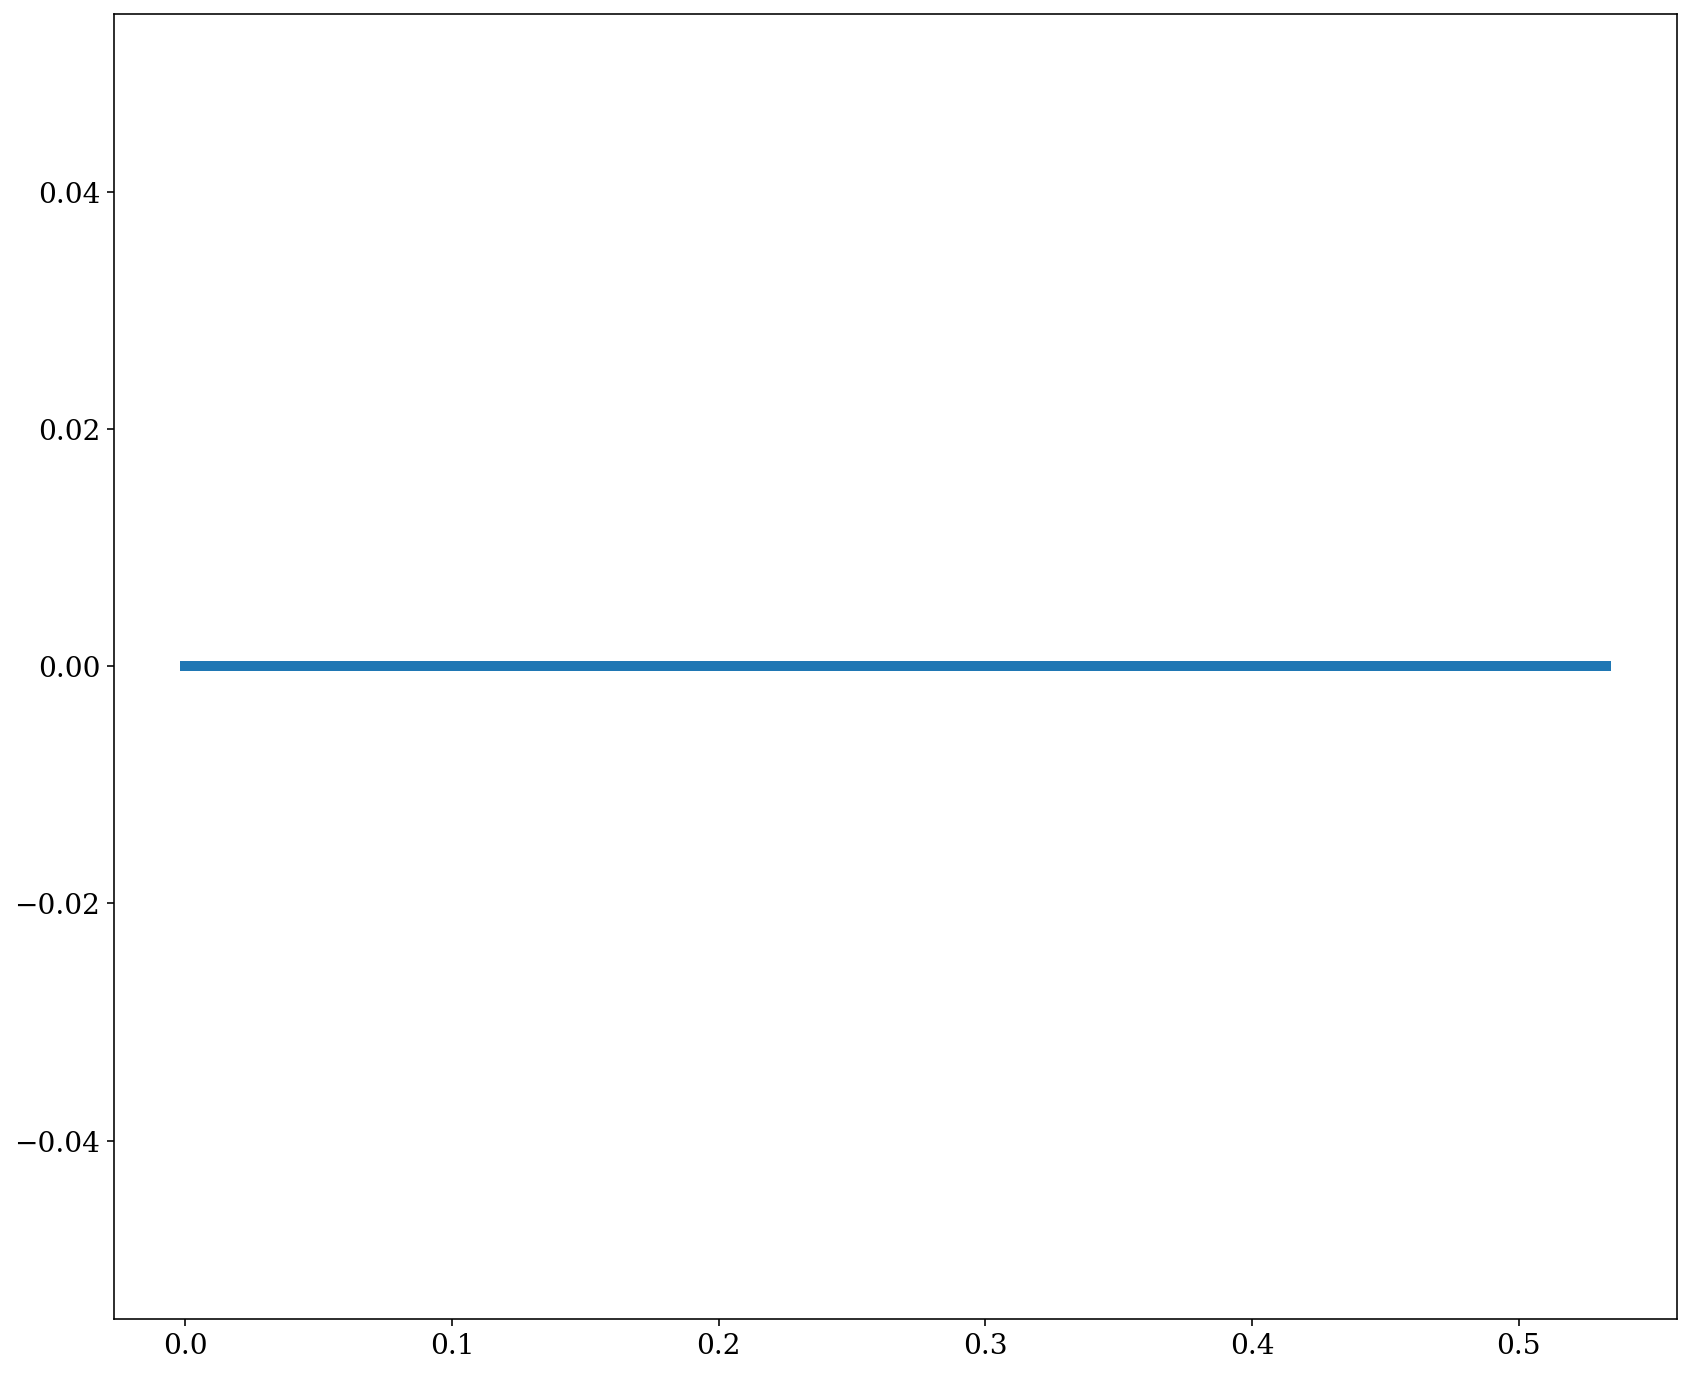

In [107]:
fig, ax = plt.subplots()
plt.plot(all_affinities[:,0],all_areas,linewidth=5)
fig.savefig('G_ex1_cycle1_3.png')

In [140]:
print(cycle_list)

[[2, 5, 1], [2, 4, 1], [2, 3, 4]]


In [141]:
print(cycle_edges_forward)
print(cycle_weights_forward)
print(products_f)

[[(2, 5), (5, 1), (1, 2)], [(2, 4), (4, 1), (1, 2)], [(2, 3), (3, 4), (4, 2)]]
[[41.67891156462585, 70.0, 63.0], [43.901098901098905, 51.999999999999986, 63], [14.0, 8.0, 45.0]]
[183804. 143820.   5040.]


In [142]:
print(cycle_edges_backward)
print(cycle_weights_backward)
print(products_b)

[[(5, 2), (1, 5), (2, 1)], [(4, 2), (1, 4), (2, 1)], [(3, 2), (4, 3), (2, 4)]]
[[53, 51, 68], [45, 47, 68], [30, 3, 56]]
[183804. 143820.   5040.]


In [143]:
print(products_f/products_b)

[1. 1. 1.]


In [144]:
num_cycles = len(cycle_list)
edge_tracker = []

In [145]:
for i in range(num_cycles):
    for j in range(len(cycle_list[i])):
        if cycle_edges_forward[i][j] in edge_tracker:
            pass
        else:
            cycle_weights_forward[i][j] = 1/(np.prod(cycle_weights_forward[i])/(cycle_weights_forward[i][j]*np.prod(cycle_weights_backward[i])))
            edge_tracker.append(cycle_edges_forward[i][j])

In [ ]:
def initial_equilibrium_parameters(cycle_list,cycle_edges_forward,cycle_weights_forward,cycle_weights_backward):
    num_cycles = len(cycle_list)
    edge_tracker = []
    
    for i in range(num_cycles):
        for j in range(len(cycle_list[i])):
            if cycle_edges_forward[i][j] in edge_tracker:
                pass
            else:
                cycle_weights_forward[i][j] = 1/(np.prod(cycle_weights_forward[i])/(cycle_weights_forward[i][j]*np.prod(cycle_weights_backward[i])))
                edge_tracker.append(cycle_edges_forward[i][j])
    
    return cycle_weights_forward, edge_tracker

In [146]:
edge_tracker

[(2, 5), (5, 1), (1, 2), (2, 4), (4, 1), (2, 3), (3, 4), (4, 2)]

In [147]:
products_f, products_b = calculate_cycle_products(cycle_weights_forward,cycle_weights_backward)
total_affinities = calculate_affinities(products_f, products_b, cycle_list)
print(total_affinities)

[0. 0. 0.]


In [148]:
for i in range(num_cycles):
    weight_dict[edge_tracker[i]] = cycle_weights_forward[i][0]

print(weight_dict)

{(1, 2): 14.0, (1, 4): 47, (1, 5): 51, (2, 1): 68, (2, 4): 56, (2, 3): 57, (2, 5): 41.67891156462585, (3, 2): 30, (3, 4): 8, (4, 2): 45, (4, 3): 3, (4, 1): 52, (5, 2): 53, (5, 1): 43.901098901098905}


In [149]:
weight_list = np.fromiter(weight_dict.values(), dtype=float)
print(weight_list)

[14.         47.         51.         68.         56.         57.
 41.67891156 30.          8.         45.          3.         52.
 53.         43.9010989 ]


In [150]:
L = Laplacian_all(edge_list,weight_list,num_nodes,num_edges)
print(L)

[[-163.9010989    14.            0.           47.           51.        ]
 [  68.         -142.           57.           56.           41.67891156]
 [   0.           30.          -60.            8.            0.        ]
 [  52.           45.            3.         -111.            0.        ]
 [  43.9010989    53.            0.            0.          -92.67891156]]


In [151]:
t, t_rev = NG_III_autocorrelation_analytical(observable_ex1,L,tau_n,alpha=1,beta=3)

In [152]:
print(np.abs(np.trapz(t)-np.trapz(t_rev)))

2727.3474169299006


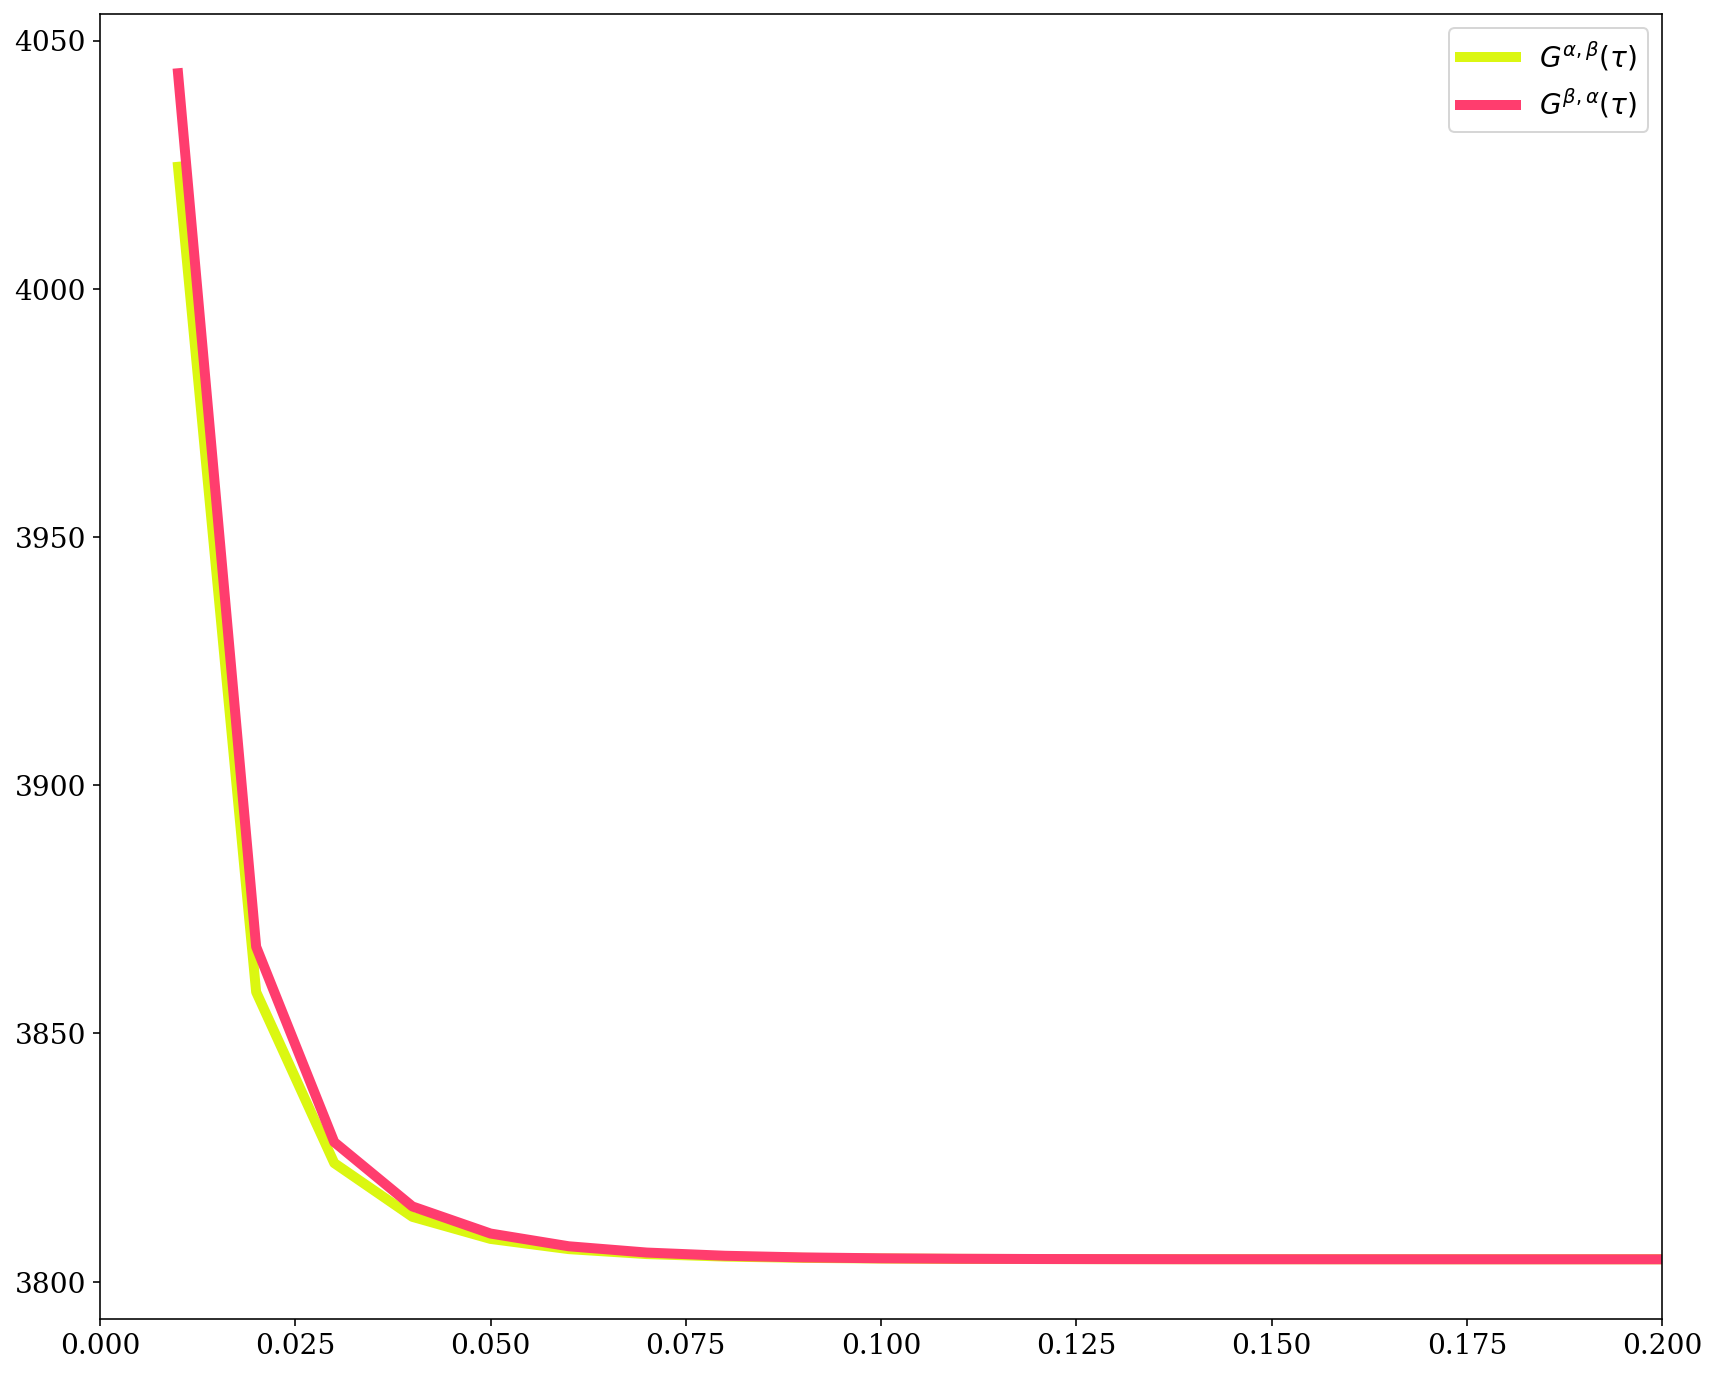

In [153]:
fig = plt.figure()
plt.plot(tau_n,t,label=r'$G^{\alpha,\beta}(\tau)$',linewidth=5,color='#DBF711')
plt.plot(tau_n,t_rev,label=r'$G^{\beta,\alpha}(\tau)$',linewidth=5, c= '#FF3D6E')
plt.xlim(0,0.2)
plt.legend()
plt.show()